<a href="https://colab.research.google.com/github/Miguel-EMC/Tarea-09/blob/main/Tarea09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Número 09

1.	Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico. los datos:


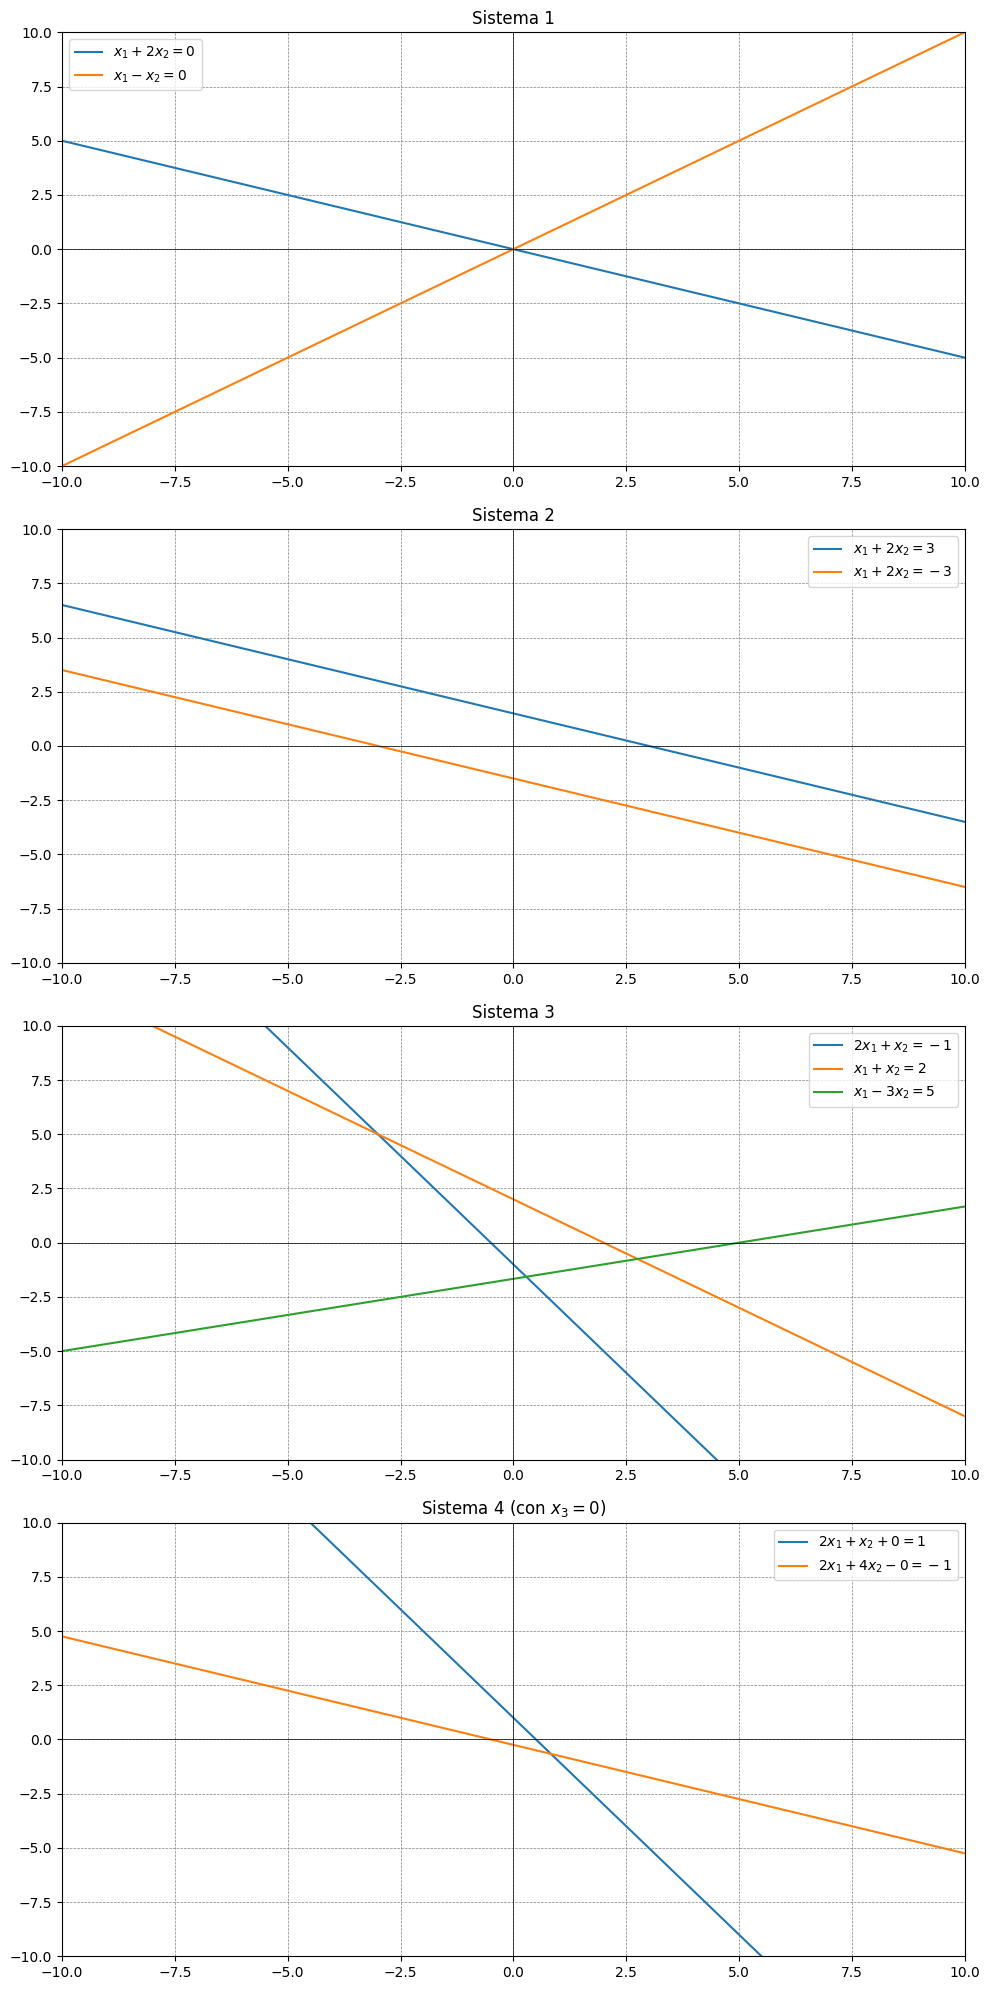

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las funciones para los sistemas
def sistema_1_func_1(x1):
    return -x1 / 2

def sistema_1_func_2(x1):
    return x1

def sistema_2_func_1(x1):
    return (3 - x1) / 2

def sistema_2_func_2(x1):
    return (-3 - x1) / 2

def sistema_3_func_1(x1):
    return -2 * x1 - 1

def sistema_3_func_2(x1):
    return 2 - x1

def sistema_3_func_3(x1):
    return (x1 - 5) / 3

# Crear las gráficas
x = np.linspace(-10, 10, 400)

fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Sistema 1
axs[0].plot(x, sistema_1_func_1(x), label=r'$x_1 + 2x_2 = 0$')
axs[0].plot(x, sistema_1_func_2(x), label=r'$x_1 - x_2 = 0$')
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)
axs[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
axs[0].set_xlim(-10, 10)
axs[0].set_ylim(-10, 10)
axs[0].legend()
axs[0].set_title('Sistema 1')

# Sistema 2
axs[1].plot(x, sistema_2_func_1(x), label=r'$x_1 + 2x_2 = 3$')
axs[1].plot(x, sistema_2_func_2(x), label=r'$x_1 + 2x_2 = -3$')
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)
axs[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
axs[1].set_xlim(-10, 10)
axs[1].set_ylim(-10, 10)
axs[1].legend()
axs[1].set_title('Sistema 2')

# Sistema 3
axs[2].plot(x, sistema_3_func_1(x), label=r'$2x_1 + x_2 = -1$')
axs[2].plot(x, sistema_3_func_2(x), label=r'$x_1 + x_2 = 2$')
axs[2].plot(x, sistema_3_func_3(x), label=r'$x_1 - 3x_2 = 5$')
axs[2].axhline(0, color='black',linewidth=0.5)
axs[2].axvline(0, color='black',linewidth=0.5)
axs[2].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
axs[2].set_xlim(-10, 10)
axs[2].set_ylim(-10, 10)
axs[2].legend()
axs[2].set_title('Sistema 3')

# Sistema 4
# Para graficar en 2D, necesitamos fijar una variable. Fijamos x_3 = 0.
def sistema_4_func_1(x1):
    return (1 - 2 * x1)

def sistema_4_func_2(x1):
    return (-1 - 2 * x1) / 4

axs[3].plot(x, sistema_4_func_1(x), label=r'$2x_1 + x_2 + 0 = 1$')
axs[3].plot(x, sistema_4_func_2(x), label=r'$2x_1 + 4x_2 - 0 = -1$')
axs[3].axhline(0, color='black',linewidth=0.5)
axs[3].axvline(0, color='black',linewidth=0.5)
axs[3].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
axs[3].set_xlim(-10, 10)
axs[3].set_ylim(-10, 10)
axs[3].legend()
axs[3].set_title('Sistema 4 (con $x_3 = 0$)')

plt.tight_layout()
plt.show()


2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es x_1= -1,x_2=2,x_3=3 )

In [ ]:
import numpy as np

def print_step(A, b, step_desc):
    print(f"\n{step_desc}:")
    print("Matriz A:")
    print(A)
    print("Vector b:")
    print(b)
    print()

def gaussian_elimination_step_by_step(A, b):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = len(b)

    for i in range(n):
        pivot = A[i, i]
        if pivot == 0:
            raise ValueError("El pivote es cero, se necesita reordenar las filas.")
        A[i] /= pivot
        b[i] /= pivot

        print_step(A, b, f"Paso {i+1}: Normalización de la fila {i}")

        for j in range(i + 1, n):
            factor = A[j, i]
            A[j] -= factor * A[i]
            b[j] -= factor * b[i]

            print_step(A, b, f"Paso {i+1}.{j-i}: Eliminación de fila {j} usando la fila {i}")

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - np.sum(A[i, i + 1:] * x[i + 1:])

        print_step(A, b, f"Paso de sustitución hacia atrás para x_{i+1}")

    return x

# Sistema a
A_a = [
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
]
b_a = [8, 1, 11]

# Sistema b
A_b = [
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
]
b_b = [-5, -1, 9]

print("Resolviendo el sistema a):")
x_a = gaussian_elimination_step_by_step(A_a, b_a)
print("Sistema a) Solución:")
print(f"x_1 = {x_a[0]:.2f}")
print(f"x_2 = {x_a[1]:.2f}")
print(f"x_3 = {x_a[2]:.2f}")

print("\nResolviendo el sistema b):")
x_b = gaussian_elimination_step_by_step(A_b, b_b)
print("Sistema b) Solución:")
print(f"x_1 = {x_b[0]:.2f}")
print(f"x_2 = {x_b[1]:.2f}")
print(f"x_3 = {x_b[2]:.2f}")

Resolviendo el sistema a):

Paso 1: Normalización de la fila 0:
Matriz A:
[[ 1.         -4.         -1.        ]
 [ 1.66666667  0.66666667  0.66666667]
 [ 2.          1.          4.        ]]
Vector b:
[-8.  1. 11.]


Paso 1.1: Eliminación de fila 1 usando la fila 0:
Matriz A:
[[ 1.         -4.         -1.        ]
 [ 0.          7.33333333  2.33333333]
 [ 2.          1.          4.        ]]
Vector b:
[-8.         14.33333333 11.        ]


Paso 1.2: Eliminación de fila 2 usando la fila 0:
Matriz A:
[[ 1.         -4.         -1.        ]
 [ 0.          7.33333333  2.33333333]
 [ 0.          9.          6.        ]]
Vector b:
[-8.         14.33333333 27.        ]


Paso 2: Normalización de la fila 1:
Matriz A:
[[ 1.         -4.         -1.        ]
 [ 0.          1.          0.31818182]
 [ 0.          9.          6.        ]]
Vector b:
[-8.          1.95454545 27.        ]


Paso 2.1: Eliminación de fila 2 usando la fila 1:
Matriz A:
[[ 1.         -4.         -1.        ]
 [ 0.        

3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

In [ ]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    # Crear la matriz aumentada
    Ab = np.hstack([A, b.reshape(-1, 1)])

    print("Matriz aumentada inicial:")
    print(Ab)

    for i in range(n):
        # Encontrar el pivote
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if max_row != i:
            # Intercambiar filas
            Ab[[i, max_row]] = Ab[[max_row, i]]

        print(f"\nDespués de intercambiar fila {i} con fila {max_row}:")
        print(Ab)

        # Normalizar la fila del pivote
        Ab[i] = Ab[i] / Ab[i, i]

        # Hacer ceros debajo del pivote
        for j in range(i + 1, n):
            Ab[j] = Ab[j] - Ab[j, i] * Ab[i]

        print(f"\nDespués de normalizar y eliminar ceros debajo del pivote en fila {i}:")
        print(Ab)

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.sum(Ab[i, i + 1:n] * x[i + 1:])

    return x

# Definir el sistema de ecuaciones
A1 = np.array([[1, -1, 3],
               [3, -3, 1],
               [1, 1, 0]], dtype=float)
b1 = np.array([2, -1, 3], dtype=float)

x1 = gaussian_elimination(A1, b1)
print(f"\nSolución del Sistema 1: {x1}")


Matriz aumentada inicial:
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]

Después de intercambiar fila 0 con fila 1:
[[ 3. -3.  1. -1.]
 [ 1. -1.  3.  2.]
 [ 1.  1.  0.  3.]]

Después de normalizar y eliminar ceros debajo del pivote en fila 0:
[[ 1.         -1.          0.33333333 -0.33333333]
 [ 0.          0.          2.66666667  2.33333333]
 [ 0.          2.         -0.33333333  3.33333333]]

Después de intercambiar fila 1 con fila 2:
[[ 1.         -1.          0.33333333 -0.33333333]
 [ 0.          2.         -0.33333333  3.33333333]
 [ 0.          0.          2.66666667  2.33333333]]

Después de normalizar y eliminar ceros debajo del pivote en fila 1:
[[ 1.         -1.          0.33333333 -0.33333333]
 [ 0.          1.         -0.16666667  1.66666667]
 [ 0.          0.          2.66666667  2.33333333]]

Después de intercambiar fila 2 con fila 2:
[[ 1.         -1.          0.33333333 -0.33333333]
 [ 0.          1.         -0.16666667  1.66666667]
 [ 0.          0.       

In [ ]:
# Definir el sistema de ecuaciones
A2 = np.array([[2, -1.5, 3],
               [-1, 0, 2],
               [4, -4.5, 5]], dtype=float)
b2 = np.array([1, 3, 1], dtype=float)

x2 = gaussian_elimination(A2, b2)
print(f"\nSolución del Sistema 2: {x2}")


Matriz aumentada inicial:
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]

Después de intercambiar fila 0 con fila 2:
[[ 4.  -4.5  5.   1. ]
 [-1.   0.   2.   3. ]
 [ 2.  -1.5  3.   1. ]]

Después de normalizar y eliminar ceros debajo del pivote en fila 0:
[[ 1.    -1.125  1.25   0.25 ]
 [ 0.    -1.125  3.25   3.25 ]
 [ 0.     0.75   0.5    0.5  ]]

Después de intercambiar fila 1 con fila 1:
[[ 1.    -1.125  1.25   0.25 ]
 [ 0.    -1.125  3.25   3.25 ]
 [ 0.     0.75   0.5    0.5  ]]

Después de normalizar y eliminar ceros debajo del pivote en fila 1:
[[ 1.         -1.125       1.25        0.25      ]
 [-0.          1.         -2.88888889 -2.88888889]
 [ 0.          0.          2.66666667  2.66666667]]

Después de intercambiar fila 2 con fila 2:
[[ 1.         -1.125       1.25        0.25      ]
 [-0.          1.         -2.88888889 -2.88888889]
 [ 0.          0.          2.66666667  2.66666667]]

Después de normalizar y eliminar ceros debajo del pivote en fila 2:

In [ ]:
# Definir el sistema de ecuaciones
A3 = np.array([[2, 0, 0, 0],
               [1, 1.5, 0, 0],
               [0, -3, 0.5, 0],
               [2, -2, 1, 1]], dtype=float)
b3 = np.array([3, 4.5, -6.6, 0.8], dtype=float)

x3 = gaussian_elimination(A3, b3)
print(f"\nSolución del Sistema 3: {x3}")


Matriz aumentada inicial:
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]

Después de intercambiar fila 0 con fila 0:
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]

Después de normalizar y eliminar ceros debajo del pivote en fila 0:
[[ 1.   0.   0.   0.   1.5]
 [ 0.   1.5  0.   0.   3. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.  -2.   1.   1.  -2.2]]

Después de intercambiar fila 1 con fila 2:
[[ 1.   0.   0.   0.   1.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.   1.5  0.   0.   3. ]
 [ 0.  -2.   1.   1.  -2.2]]

Después de normalizar y eliminar ceros debajo del pivote en fila 1:
[[ 1.          0.          0.          0.          1.5       ]
 [-0.          1.         -0.16666667 -0.          2.2       ]
 [ 0.          0.          0.25        0.         -0.3       ]
 [ 0.          0.          0.66666667  1.          2.2       ]]

Después de intercambiar fila 2 con fila 3:

In [ ]:
# Definir el sistema de ecuaciones
A4 = np.array([[1, 1, 0, 1],
               [2, 1, -1, 1],
               [4, -1, -2, 2],
               [3, -1, -1, 2]], dtype=float)
b4 = np.array([2, 1, 0, -3], dtype=float)

x4 = gaussian_elimination(A4, b4)
print(f"\nSolución del Sistema 4: {x4}")


Matriz aumentada inicial:
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2.  0.]
 [ 3. -1. -1.  2. -3.]]

Después de intercambiar fila 0 con fila 2:
[[ 4. -1. -2.  2.  0.]
 [ 2.  1. -1.  1.  1.]
 [ 1.  1.  0.  1.  2.]
 [ 3. -1. -1.  2. -3.]]

Después de normalizar y eliminar ceros debajo del pivote en fila 0:
[[ 1.   -0.25 -0.5   0.5   0.  ]
 [ 0.    1.5   0.    0.    1.  ]
 [ 0.    1.25  0.5   0.5   2.  ]
 [ 0.   -0.25  0.5   0.5  -3.  ]]

Después de intercambiar fila 1 con fila 1:
[[ 1.   -0.25 -0.5   0.5   0.  ]
 [ 0.    1.5   0.    0.    1.  ]
 [ 0.    1.25  0.5   0.5   2.  ]
 [ 0.   -0.25  0.5   0.5  -3.  ]]

Después de normalizar y eliminar ceros debajo del pivote en fila 1:
[[ 1.         -0.25       -0.5         0.5         0.        ]
 [ 0.          1.          0.          0.          0.66666667]
 [ 0.          0.          0.5         0.5         1.16666667]
 [ 0.          0.          0.5         0.5        -2.83333333]]

Después de intercambiar fila 2 con fila 2:

<ipython-input-5-69cd15d24164>:22: RuntimeWarning: divide by zero encountered in divide
  Ab[i] = Ab[i] / Ab[i, i]
<ipython-input-5-69cd15d24164>:22: RuntimeWarning: invalid value encountered in divide
  Ab[i] = Ab[i] / Ab[i, i]
<ipython-input-5-69cd15d24164>:34: RuntimeWarning: invalid value encountered in multiply
  x[i] = Ab[i, -1] - np.sum(Ab[i, i + 1:n] * x[i + 1:])


4.	Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

In [ ]:
# Definimos nuevamente la matriz aumentada para el sistema (a)
A = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], dtype=np.float32)

# Reaplicamos eliminación gaussiana
def gaussian_elimination(matrix):
    rows, cols = matrix.shape

    for i in range(rows):
        # Make the diagonal contain all 1s
        matrix[i] = matrix[i] / matrix[i][i]

        # Make the elements below the pivot equals to 0
        for j in range(i + 1, rows):
            matrix[j] = matrix[j] - matrix[j][i] * matrix[i]

    # Back substitution
    x = np.zeros(rows)
    for i in range(rows - 1, -1, -1):
        x[i] = matrix[i][-1] - np.sum(matrix[i][i + 1:rows] * x[i + 1:rows])

    return x

solution_a = gaussian_elimination(A.copy())
solution_a


array([-227.07665985,  476.92261706, -177.69215393])

6.	Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥𝑗 representa la población de las j-ésimas especies, para cada 𝑗=1,⋯,𝑛; 𝑏𝑖; representa el suministro diario disponible del i-ésimo alimento y 𝑎𝑖𝑗 representa la cantidad del i-ésimo alimento.

In [ ]:
import numpy as np

# Definimos la matriz aumentada para el sistema (a)
A = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], dtype=np.float32)

# Aplicamos eliminación gaussiana
def gaussian_elimination(matrix):
    rows, cols = matrix.shape

    for i in range(rows):
        # Make the diagonal contain all 1s
        matrix[i] = matrix[i] / matrix[i][i]

        # Make the elements below the pivot equals to 0
        for j in range(i + 1, rows):
            matrix[j] = matrix[j] - matrix[j][i] * matrix[i]

    # Back substitution
    x = np.zeros(rows)
    for i in range(rows - 1, -1, -1):
        x[i] = matrix[i][-1] - np.sum(matrix[i][i + 1:rows] * x[i + 1:rows])

    return x

solution_a = gaussian_elimination(A.copy())
solution_a


array([-227.07665985,  476.92261706, -177.69215393])

In [ ]:
# Definimos la matriz aumentada para el sistema (b)
B = np.array([
    [3.3333, 15920, -10.3333, 15913],
    [2.2222, 16.71, 9.612, 28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], dtype=np.float32)

# Aplicamos eliminación gaussiana
solution_b = gaussian_elimination(B.copy())
solution_b


array([0.99993   , 1.00000012, 1.00003397])

In [ ]:
# Definimos la matriz aumentada para el sistema (c)
C = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
], dtype=np.float32)

# Aplicamos eliminación gaussiana
solution_c = gaussian_elimination(C.copy())
solution_c


array([-0.03174723,  0.59525353, -2.38099092,  2.77780318])

In [ ]:
from sympy import Matrix, symbols, Eq, solve, det

# Definimos las variables y el parámetro alpha
x1, x2, x3, alpha = symbols('x1 x2 x3 alpha')

# Definimos la matriz de coeficientes
A = Matrix([
    [1, -1, alpha],
    [-1, 2, -alpha],
    [alpha, 1, 1]
])

# Calculamos el determinante de la matriz de coeficientes
determinante_A = A.det()
determinante_A


1 - alpha**2

7.	Repita el ejercicio 4 con el método Gauss-Jordan.

In [ ]:
import numpy as np

# Función para aplicar el método Gauss-Jordan
def gauss_jordan_elimination(A):
    rows, cols = A.shape

    for i in range(rows):
        # Hacer el pivote 1 dividiendo la fila por A[i, i]
        A[i] = A[i] / A[i, i]

        # Hacer ceros en todas las otras filas en la columna i
        for j in range(rows):
            if i != j:
                A[j] = A[j] - A[j, i] * A[i]

    return A

# Definimos las matrices aumentadas de los sistemas
systems = [
    np.array([
        [1/4, 1/5, 1/6, 9],
        [1/3, 1/4, 1/5, 8],
        [1/2, 1, 2, 8]
    ], dtype=np.float32),
    np.array([
        [3.333, 15920, -10.333, 15913],
        [2.222, 16.71, 9.612, 28.544],
        [1.5611, 5.1791, 1.6852, 8.4254]
    ], dtype=np.float32),
    np.array([
        [1, 1/2, 1/3, 1/4, 1/6],
        [1/2, 1/3, 1/4, 1/5, 1/7],
        [1/3, 1/4, 1/5, 1/6, 1/8],
        [1/4, 1/5, 1/6, 1/7, 1/9]
    ], dtype=np.float32),
    np.array([
        [2, 1, -1, 1, -3, 7],
        [1, 0, 2, -1, 1, 2],
        [0, -2, -1, 1, -1, -5],
        [3, 1, -4, 0, 5, 6],
        [1, -1, -1, -1, 1, -3]
    ], dtype=np.float32)
]

# Resolver cada sistema
solutions = []
for system in systems:
    reduced_system = gauss_jordan_elimination(system.copy())
    solutions.append(reduced_system[:, -1])

solutions


[array([-227.07668,  476.9226 , -177.69215], dtype=float32),
 array([0.9998865, 1.0000001, 1.0001063], dtype=float32),
 array([-0.03174722,  0.5952536 , -2.380991  ,  2.7778032 ], dtype=float32),
 array([1.8830409 , 2.8070173 , 0.73099416, 1.4385965 , 0.09356724],
       dtype=float32)]